<a href="https://colab.research.google.com/github/alancolinarce/ArchivesUnleashed/blob/main/TopicModeling_SS_PaisesAL_enPDFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Código para importar archivos locales

from google.colab import files
uploaded = files.upload()

Saving TXTs_PaisesAL_en.zip to TXTs_PaisesAL_en.zip


### **Instalación de mallet**

In [ ]:
#Instalé mallet siguiendo este tutorial: https://medium.com/analytics-vidhya/mallet-machine-learning-for-language-toolkit-installation-on-google-colaboratory-80b75fe486cb

import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.16" 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)


In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

In [ ]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
path_to_mallet = '/content/mallet-2.0.8/bin/mallet'

#path_to_mallet = '/Users/alancolin/mallet-2.0.8/bin/mallet'

In [ ]:
pip install little_mallet_wrapper

### Importar paquetes y extraer archivos de carpeta zip

In [ ]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

In [ ]:
#Tutorial para extraer archivos de una carpeta zip: https://appdividend.com/2022/09/24/python-unzip/

import zipfile

In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile("TXTs_PaisesAL_en.zip", 'r') as zObject:
  zObject.extractall()

In [ ]:
directory = "TXTs_PaisesAL_en"

In [ ]:
files = glob.glob(f"{directory}/*.txt")
files

['TXTs_PaisesAL_en/EarlyChildbearing_Honduras.pdf.txt',
 'TXTs_PaisesAL_en/EarlyChildbearing-guatemala.pdf.txt',
 'TXTs_PaisesAL_en/guatemalaSexEd.pdf.txt',
 'TXTs_PaisesAL_en/colombia-graphic_SexualHealth.pdf.txt',
 'TXTs_PaisesAL_en/peruSexEd_3.pdf.txt',
 'TXTs_PaisesAL_en/Dominican_Women_SexualHealth.pdf.txt',
 'TXTs_PaisesAL_en/Unintended-Pregnancy-Colombia.pdf.txt',
 'TXTs_PaisesAL_en/SexualHealth-Honduras.pdf.txt',
 'TXTs_PaisesAL_en/Cuba_GenderEquality.pdf.txt',
 'TXTs_PaisesAL_en/Women_Climate_Crisis_Colombia__Greens_Europe_.pdf.txt',
 'TXTs_PaisesAL_en/sexuality_education_policies_and_their_implementation_in_peru.pdf.txt',
 'TXTs_PaisesAL_en/peruSexEd_1.pdf.txt',
 'TXTs_PaisesAL_en/peruSexEd_graphic2.pdf.txt',
 'TXTs_PaisesAL_en/Facts_Induced_Abortion_Mexico.pdf.txt',
 'TXTs_PaisesAL_en/sex_ed_peru_fact_sheet_eng.pdf.txt',
 'TXTs_PaisesAL_en/FB-pregnancy-abortion-Colombia.pdf.txt',
 'TXTs_PaisesAL_en/guatemalaSexEd_2.pdf.txt',
 'TXTs_PaisesAL_en/guatemalaSexEd_3.pdf.txt',
 'TX

# Análisis

In [ ]:
training_data = []
for file in files:
    text = open(file, encoding='utf-8').read()
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    training_data.append(processed_text)

In [ ]:
original_texts = []
for file in files:
    text = open(file, encoding='utf-8').read()
    original_texts.append(text)

In [ ]:
little_mallet_wrapper.process_string(text, numbers='remove')

'fact sheet november unintended pregnancy induced abortion mexico mexico constitution amended recognize right citizens decide free responsible informed manner number spacing children year general population law established government must offer family planning services cost public health institutions unintended pregnancy remains widespread problem point early government expanded access family planning services considerably especially rural areas less developed parts country although contraceptive use doubled since annual rate increase slowed recent years come halt estimated unintended pregnancies result induced abortion end unplanned births end miscarriages however abortion highly legally restricted states states abortion permitted pregnancy result rape save life pregnant woman pregnancy poses severe risk woman health cases severe fetal impairment however women meeting criteria often difficulty obtaining unable obtain legal procedure stigma lack effective administrative processes enabl

In [ ]:
pdf_titles = [Path(file).stem for file in files]
pdf_titles

['EarlyChildbearing_Honduras.pdf',
 'EarlyChildbearing-guatemala.pdf',
 'guatemalaSexEd.pdf',
 'colombia-graphic_SexualHealth.pdf',
 'peruSexEd_3.pdf',
 'Dominican_Women_SexualHealth.pdf',
 'Unintended-Pregnancy-Colombia.pdf',
 'SexualHealth-Honduras.pdf',
 'Cuba_GenderEquality.pdf',
 'Women_Climate_Crisis_Colombia__Greens_Europe_.pdf',
 'sexuality_education_policies_and_their_implementation_in_peru.pdf',
 'peruSexEd_1.pdf',
 'peruSexEd_graphic2.pdf',
 'Facts_Induced_Abortion_Mexico.pdf',
 'sex_ed_peru_fact_sheet_eng.pdf',
 'FB-pregnancy-abortion-Colombia.pdf',
 'guatemalaSexEd_2.pdf',
 'guatemalaSexEd_3.pdf',
 'sexuality_education_policies_and_their_implementation_in_guatemala.pdf',
 'guatemalaSexEd_4.pdf',
 'Letter_Mexico_Gender_ParisAgreement.pdf',
 'sex_ed_guatemala_fact_sheet_eng.pdf',
 'EarlyChildbearing_Nicaragua2006-09.pdf',
 'induced_abortion-chile.pdf',
 'SexualHealth-Guatemala.pdf',
 'ArgentinaSurveyEnglish3.pdf',
 '2014-AAUW-Delegation-Cuba-White-Paper-nsa.pdf',
 'Unintende

In [ ]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 29
Mean Number of Words per Document: 3177.8
Vocabulary Size: 8823


In [ ]:
num_topics = 15

In [ ]:
training_data = training_data


In [ ]:
#Change to your desired output directory
output_directory_path = 'topic-model-output/meTooTextAnalysis'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [ ]:
little_mallet_wrapper.quick_train_topic_model(path_to_mallet,
                                             output_directory_path,
                                             num_topics,
                                             training_data)

In [ ]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['women', 'pregnancy', 'health', 'abortion', 'use', 'data', 'care', 'need', 'method', 'rate', 'per', 'contraceptive', 'services', 'contraception', 'using', 'two', 'one', 'legal', 'woman', 'poor']

✨Topic 1✨

['abortion', 'mexico', 'region', 'induced', 'abortions', 'federal', 'unintended', 'district', 'méxico', 'states', 'complications', 'developed', 'estimated', 'misoprostol', 'estimates', 'mexican', 'conapo', 'city', 'pregnancies', 'federative']

✨Topic 2✨

['women', 'cuba', 'cuban', 'delegates', 'violence', 'aauw', 'gender', 'percent', 'education', 'fmc', 'delegation', 'director', 'state', 'men', 'society', 'domestic', 'also', 'department', 'learned', 'university']

✨Topic 3✨

['teachers', 'students', 'education', 'sexuality', 'sexual', 'cse', 'topics', 'school', 'schools', 'training', 'teaching', 'methods', 'guatemala', 'gender', 'teacher', 'skills', 'curriculum', 'taught', 'information', 'comprehensive']

✨Topic 4✨

['abortion', 'catholic', 'legal', 'would', 'vote', 'bis

In [ ]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [ ]:
pdf_to_check = 'Unintended-Pregnancy-Mexico.pdf'

pdf_number = pdf_titles.index(pdf_to_check)

print(f"Topic Distributions for {pdf_titles[pdf_number]}\n")
for topic_number, (topic, topic_distribution) in enumerate(zip(topics, topic_distributions[pdf_number])):
    print(f"✨Topic {topic_number} {topic[:6]} ✨\nProbability: {round(topic_distribution, 3)}\n")

Topic Distributions for Unintended-Pregnancy-Mexico.pdf

✨Topic 0 ['women', 'pregnancy', 'health', 'abortion', 'use', 'data'] ✨
Probability: 0.343

✨Topic 1 ['abortion', 'mexico', 'region', 'induced', 'abortions', 'federal'] ✨
Probability: 0.338

✨Topic 2 ['women', 'cuba', 'cuban', 'delegates', 'violence', 'aauw'] ✨
Probability: 0.0

✨Topic 3 ['teachers', 'students', 'education', 'sexuality', 'sexual', 'cse'] ✨
Probability: 0.0

✨Topic 4 ['abortion', 'catholic', 'legal', 'would', 'vote', 'bishops'] ✨
Probability: 0.0

✨Topic 5 ['reproductive', 'young', 'among', 'people', 'sex', 'school'] ✨
Probability: 0.02

✨Topic 6 ['also', 'http', 'one', 'table', 'use', 'services'] ✨
Probability: 0.044

✨Topic 7 ['rights', 'human', 'mujer', 'take', 'gender', 'agreement'] ✨
Probability: 0.007

✨Topic 8 ['women', 'rural', 'climate', 'water', 'colombia', 'lebrija'] ✨
Probability: 0.0

✨Topic 9 ['ucayali', 'lima', 'ayacucho', 'peru', 'regions', 'parents'] ✨
Probability: 0.0

✨Topic 10 ['health', 'salud'

In [ ]:
import random
target_labels = random.sample(pdf_titles, 10)

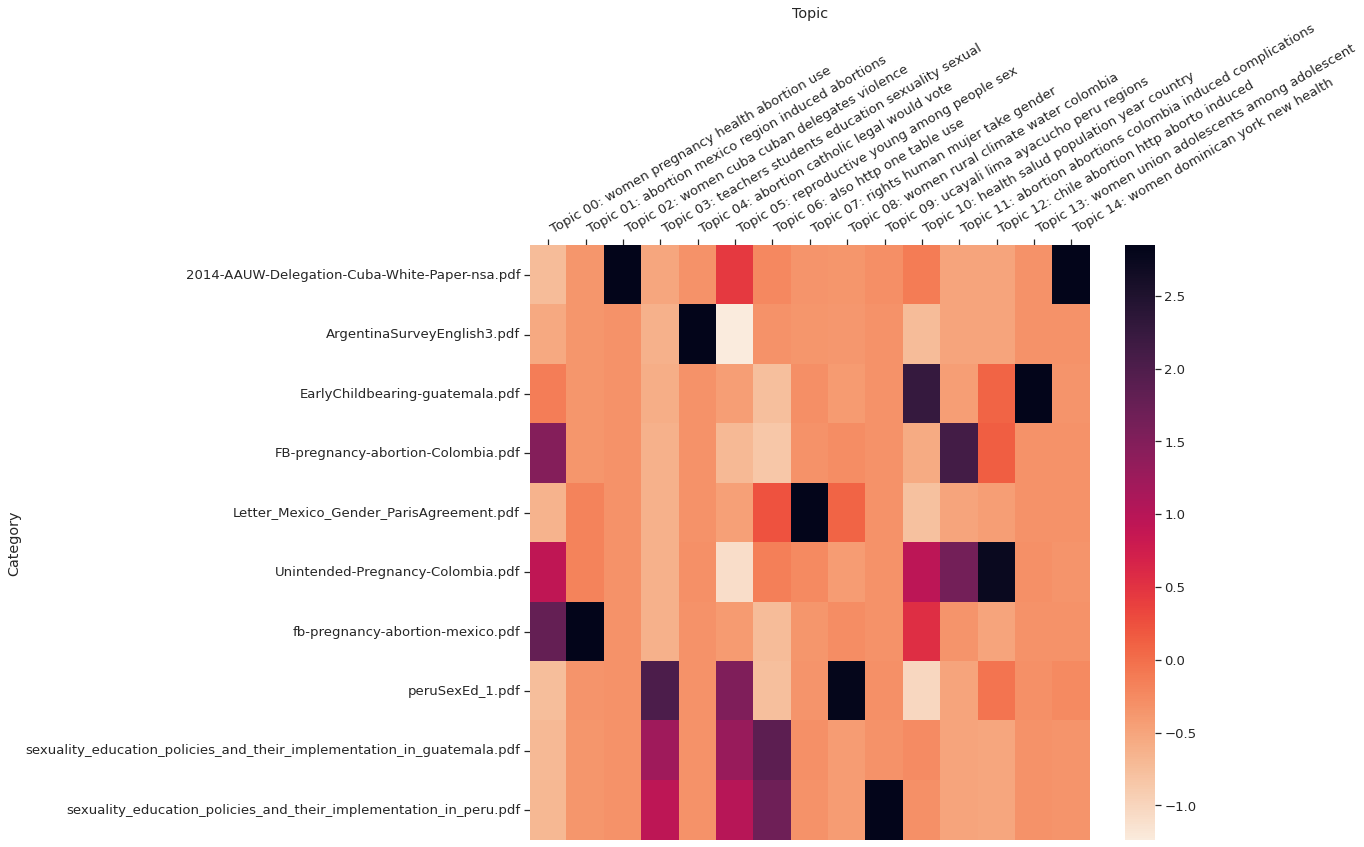

In [ ]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(pdf_titles,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim= (18, 12)
                                     )

In [ ]:
training_data_pdf_titles = dict(zip(training_data, pdf_titles))
training_data_original_text = dict(zip(training_data, original_texts))

In [ ]:
def display_top_titles_per_topic(topic_number=0, number_of_documents=5):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), training_data_pdf_titles[document] + "\n")
    return

In [ ]:
display_top_titles_per_topic(topic_number=0, number_of_documents=5)


✨Topic 0✨

['women', 'pregnancy', 'health', 'abortion', 'use', 'data', 'care', 'need', 'method', 'rate', 'per', 'contraceptive', 'services', 'contraception', 'using', 'two', 'one', 'legal', 'woman', 'poor']

0.5397 Facts_Induced_Abortion_Mexico.pdf

0.519 SexualHealth-Honduras.pdf

0.5072 SexualHealth-Guatemala.pdf

0.4813 fb-pregnancy-abortion-mexico.pdf

0.4252 FB-pregnancy-abortion-Colombia.pdf



In [ ]:
display_top_titles_per_topic(topic_number=1, number_of_documents=5)

✨Topic 1✨

['abortion', 'mexico', 'region', 'induced', 'abortions', 'federal', 'unintended', 'district', 'méxico', 'states', 'complications', 'developed', 'estimated', 'misoprostol', 'estimates', 'mexican', 'conapo', 'city', 'pregnancies', 'federative']

0.3383 Unintended-Pregnancy-Mexico.pdf

0.2996 Facts_Induced_Abortion_Mexico.pdf

0.2702 fb-pregnancy-abortion-mexico.pdf

0.0161 Unintended-Pregnancy-Colombia.pdf

0.0153 Letter_Mexico_Gender_ParisAgreement.pdf

